In [12]:
from mini_sim.mini_sim_v3 import *
import matplotlib.pyplot as plt
import json
%matplotlib inline
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


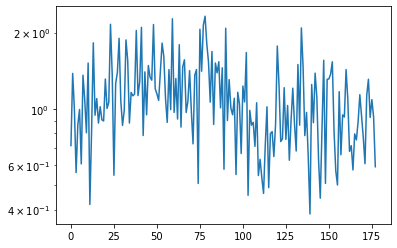

In [146]:
with open('loss.json', 'r') as f:
    data = json.load(f)
plt.semilogy(data[::10])

In [141]:
dummy = {
    "spatialDistribDemandOccurance": [],
    "spatialDistribDemandDropOff": [],
    "TemporalDemandVariation": []
}
M, N = 100, 100

env1 = Env(M, N, dummy, 10, 100, 1000, verbose = False, costType = 1)

PATH = 'torchModel'
env1.targetFunction.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [142]:
# (v - d**60 * v - a) ** 2
# (v - d ** 60 * v - a) = 0
# v (1 - d ** 60) = a
# v = a / (1 - d ** 60)

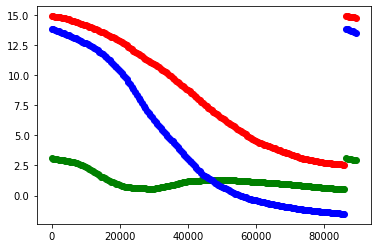

In [143]:
for m in range(0,90000,500):
    plt.scatter(m, env1.valueFunctionGet(np.array([100, 100, m]).reshape(1, -1)).item(), c='red')
for m in range(0,90000,500):
    plt.scatter(m, env1.valueFunctionGet(np.array([50, 50, m]).reshape(1, -1)).item(), c='green')
for m in range(0,90000,500):
    plt.scatter(m, env1.valueFunctionGet(np.array([0, 0, m]).reshape(1, -1)).item(), c='blue')


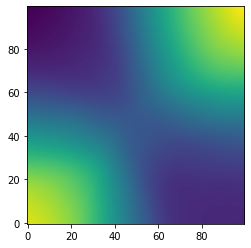

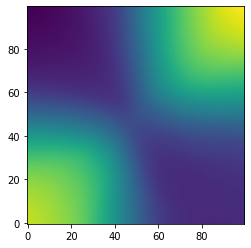

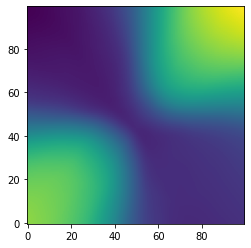

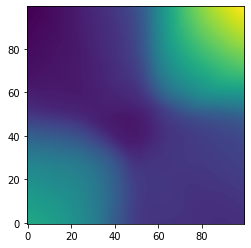

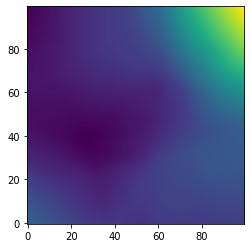

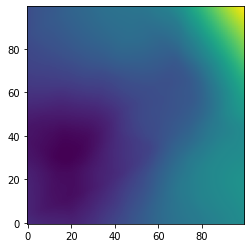

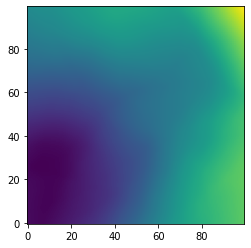

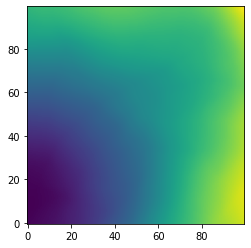

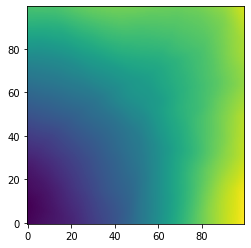

In [144]:
out = np.zeros((M, N))

for time in range(0, 90000, 10000):
    for n in range(N):
        for m in range(M):
            out[m,n] = env1.valueFunctionGet(np.array([n, m, time]).reshape(1, -1)).item()
    plt.imshow(out, origin = 'lower')
    plt.show()